<a href="https://colab.research.google.com/github/Donein/ML-Classification-mobile-price-prediction-/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# Description:-

# Battery_power - Total energy a battery can store in one time measured in mAh
# Blue - Has bluetooth or not
# Clock_speed - speed at which microprocessor executes instructions *italicized text*
Dual_sim - Has dual sim support or not
Fc - Front Camera mega pixels
Four_g - Has 4G or not
Int_memory - Internal Memory in Gigabytes
M_dep - Mobile Depth in cm
Mobile_wt - Weight of mobile phone
N_cores - Number of cores of processor
Pc - Primary Camera mega pixels
Px_height - Pixel Resolution Height
Px_width - Pixel Resolution Width
Ram - Random Access Memory in Mega
Touch_screen - Has touch screen or not
Wifi - Has wifi or not
Sc_h - Screen Height of mobile in cm
Sc_w - Screen Width of mobile in cm
Talk_time - longest time that a single battery charge will last when you are
Three_g - Has 3G or not
Wifi - Has wifi or not
Price_range - This is the target variable with value of 0(low cost), 1(medium cost),

*   List item
*   List item



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import math
import seaborn as sns
import sklearn
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report


In [2]:
# Hiding warnings after final edit
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Data_mobile_price_range.csv')
data.head().T

,0,1,2,3,4
battery_power,842.0,1021.0,563.0,615.0,1821.0
blue,0.0,1.0,1.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,0.0,1.0,1.0,0.0,0.0
fc,1.0,0.0,2.0,0.0,13.0
four_g,0.0,1.0,1.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188.0,136.0,145.0,131.0,141.0
n_cores,2.0,3.0,5.0,6.0,2.0


In [5]:
# Columns available in the data
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Data Analysis

In [6]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Minimum value should not be zero for px_height and sc_w

In [8]:
# Number of phones with zero sc_w value
zero_sc_w = len(data[data.sc_w == 0])
print(zero_sc_w)

180


In [9]:
# Number of phones with zero px_height value
zero_px_height = len(data[data.px_height == 0])
print(zero_px_height)

2


To fix the zero minimum value problem we will assign mean values to those two columns

In [10]:
data['sc_w'][data[data.sc_w == 0].index] = data.sc_w.mean()
data['px_height'][data[data.sc_w == 0].index] = data.px_height.mean()

In [11]:
# Number of unique values in each column
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [12]:
# Checking for the null values in each column
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no null values in any of the column

# Outlier Detection

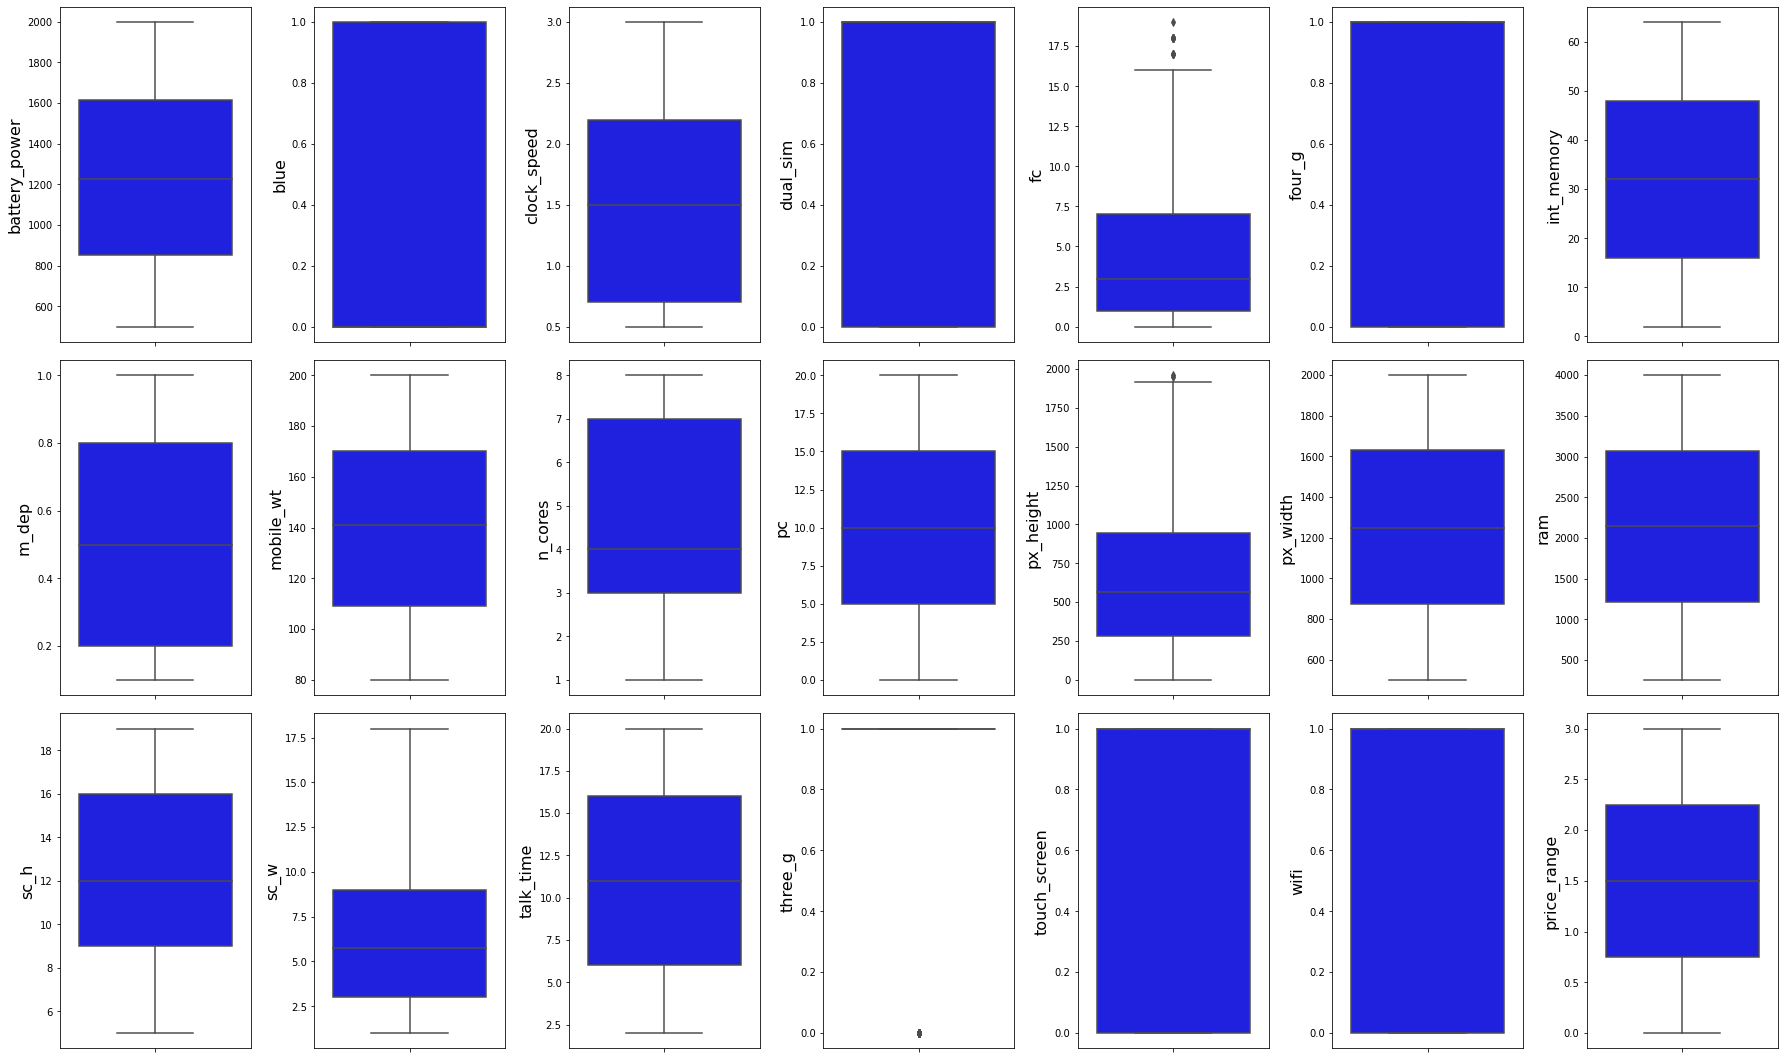

In [13]:
i, j = 0, 0
Plots_per_row = 7
fig, axs = plt.subplots(math.ceil(len(data.columns)/Plots_per_row), Plots_per_row, figsize = (25,15))

for col in data.columns:
  plt.tight_layout()
  p = sns.boxplot(y=data[col], ax = axs[i,j], color='blue')
  p.set_ylabel(col, fontsize = 16)
  j+=1
  if j % Plots_per_row == 0:
    i+=1
    j=0
plt.show()



No extreme outliers were detected

**Point plots of all features on 'Price Range'**

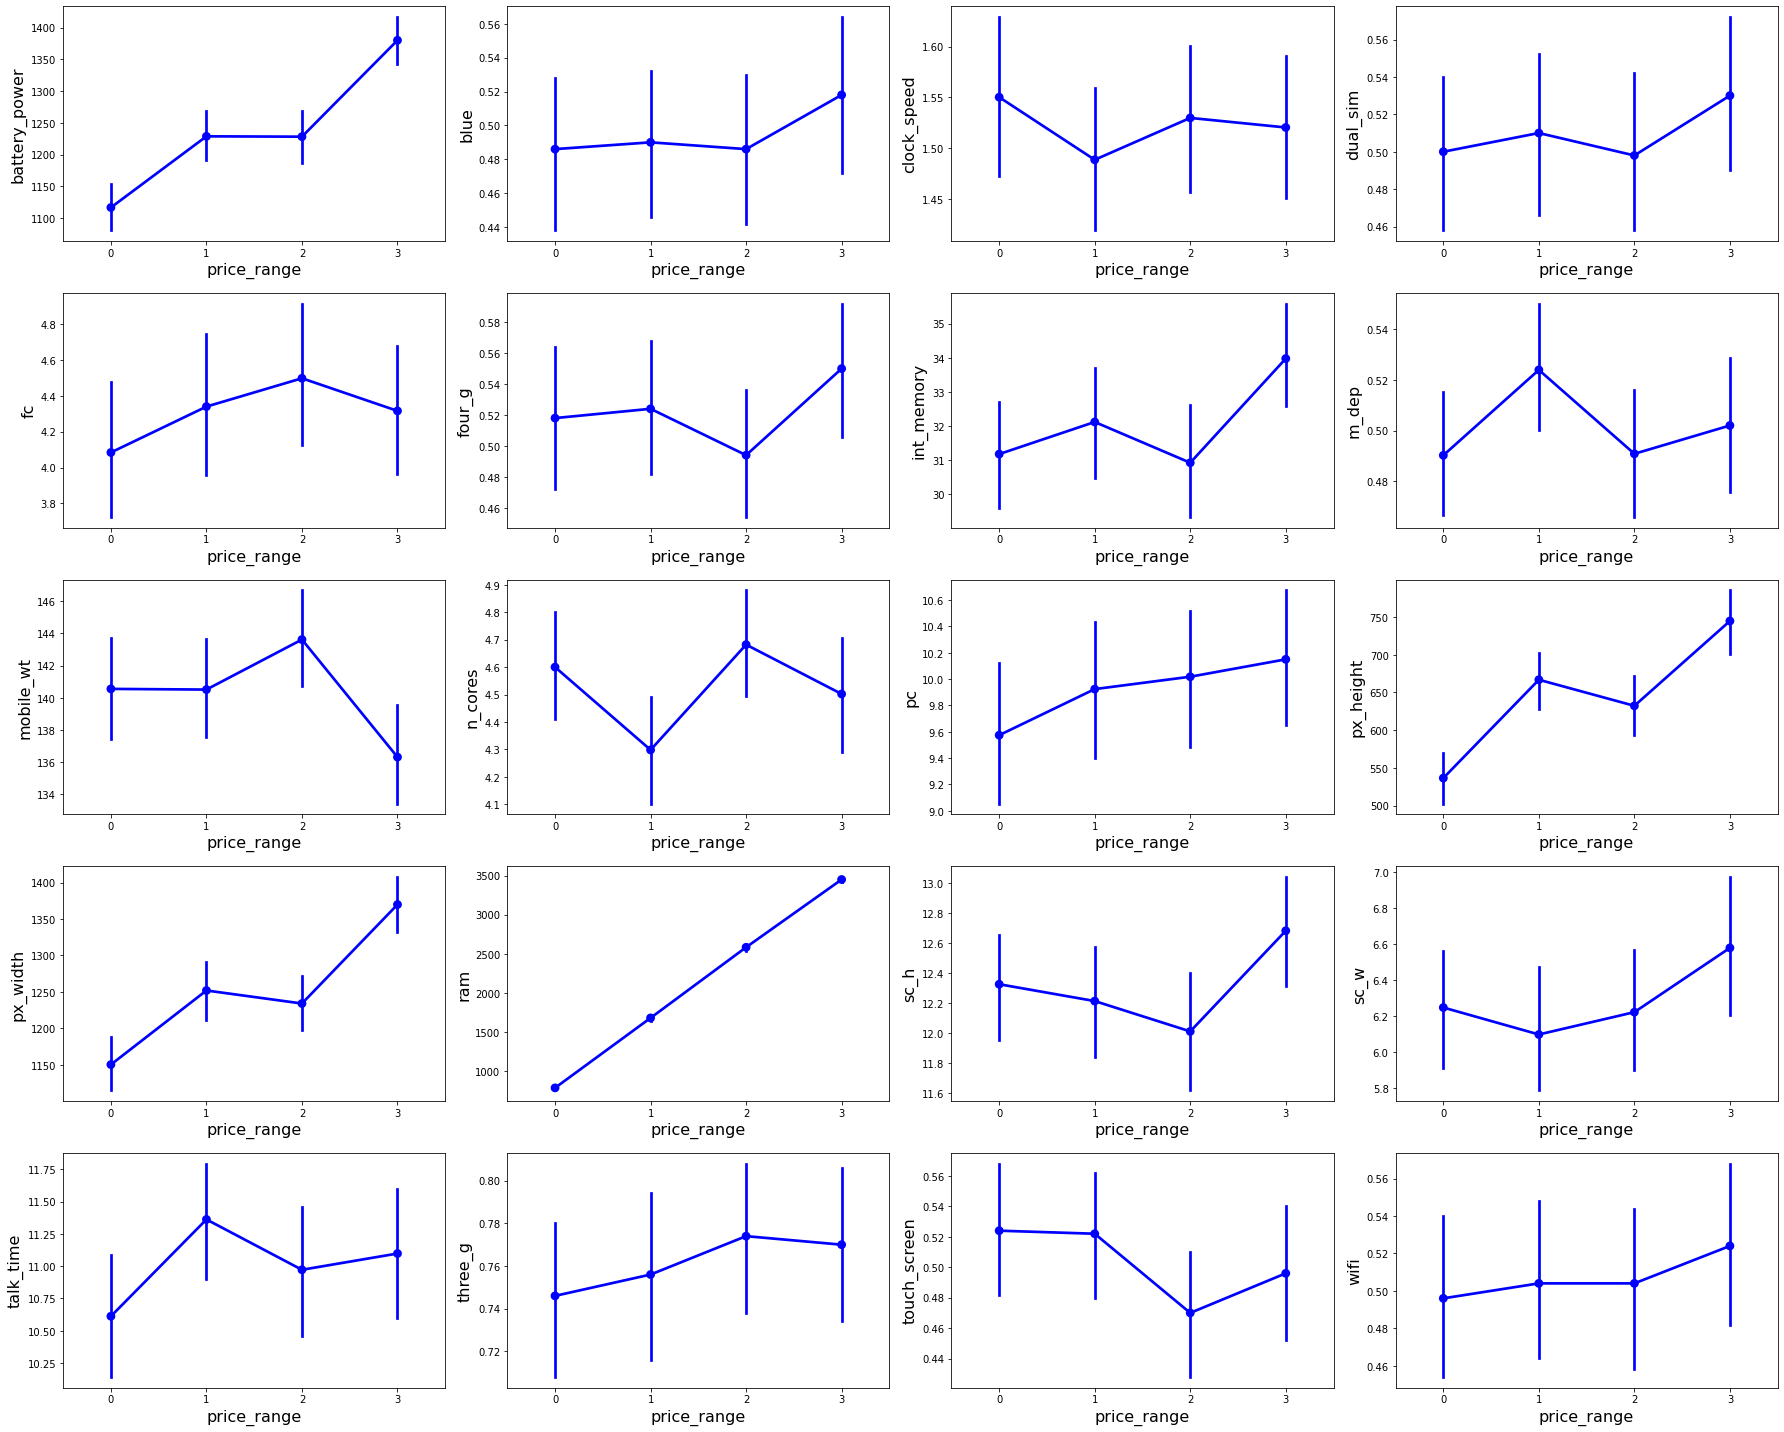

In [14]:
i, j = 0, 0
plots_per_row = 4
fig, axs = plt.subplots(math.ceil((len(data.columns)-1)/plots_per_row), plots_per_row, figsize = (25,20))

for col in data.columns:
  if col == 'price_range':
    continue
  else:
    plt.tight_layout()
    n = sns.pointplot(data=data, x='price_range', y=data[col], ax=axs[i,j], color='blue')
    n.set_ylabel(col, fontsize=16)
    n.set_xlabel('price_range', fontsize=16)
    j+=1
    if j% plots_per_row == 0:
      i+=1
      j=0
plt.show() 



**Bar plots of all columns except univariate columns and price range**

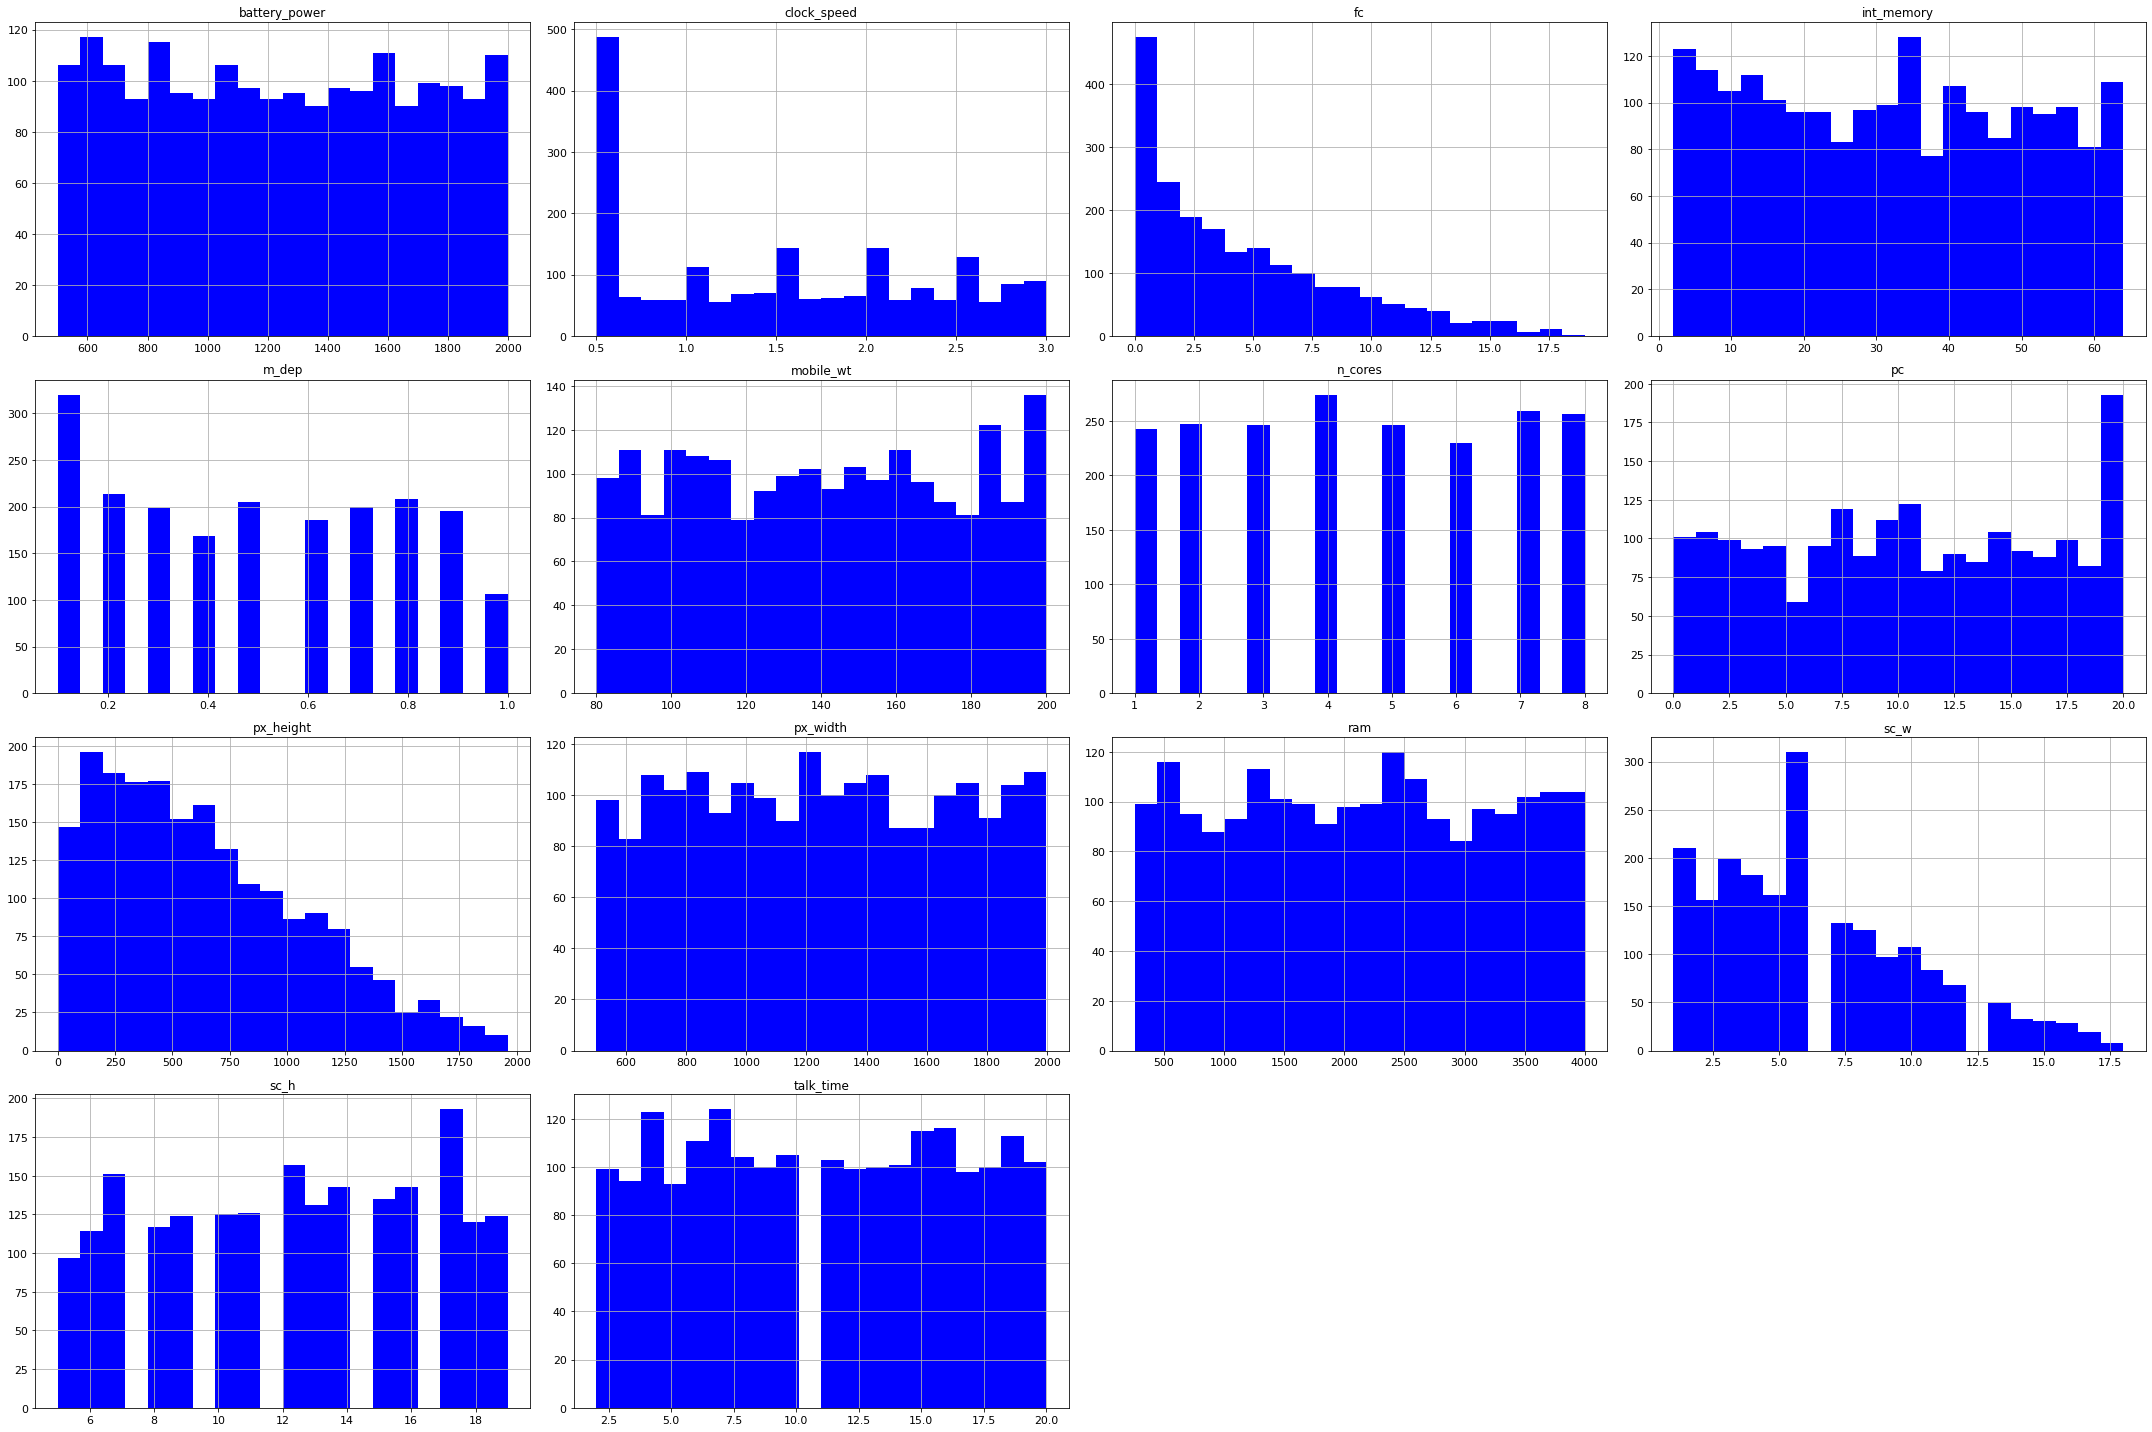

In [15]:
col = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_w', 'sc_h', 'talk_time']
data.hist(bins=20, figsize=(30,20), color='blue', column=col, xlabelsize=11, ylabelsize=11)
plt.tight_layout()
plt.show()

**Pie Plot for univariate analysis**

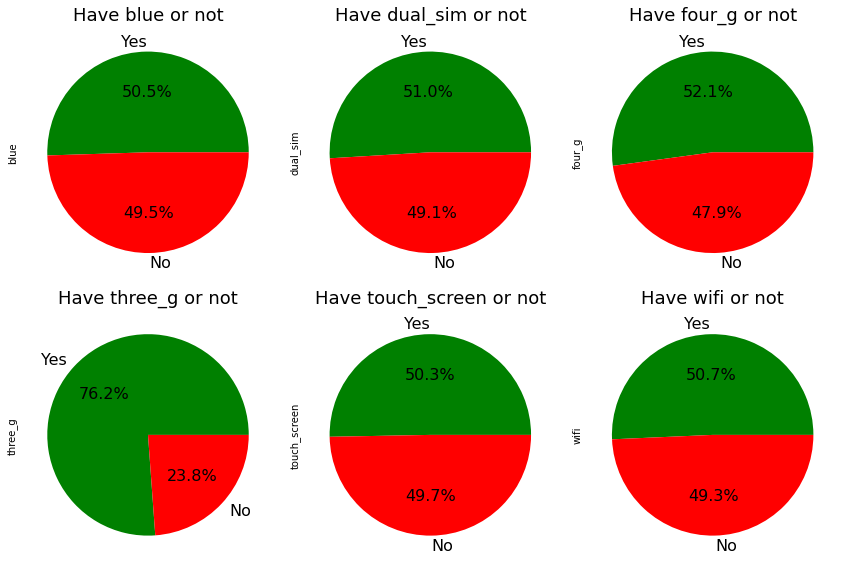

In [16]:
plt.figure(figsize=(12,8))

rows=2
columns=3
count=1
univariate_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
labels=['Yes', 'No']
for var in univariate_features:
  plt.subplot(rows, columns, count)
  data[var].value_counts().plot.pie(autopct= '%.1f%%', fontsize=16, labels=labels, colors = ['green','red'])
  plt.title(f'Have {var} or not', fontsize=18)
  plt.tight_layout()
  count=count+1

# Heatmap to visualise - Correlation

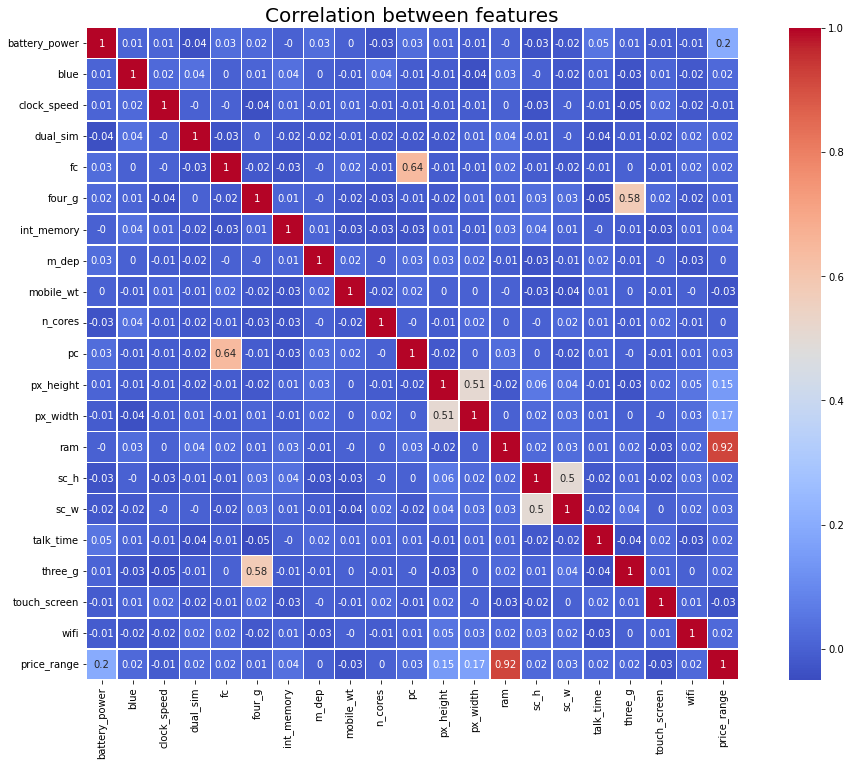

In [17]:
plt.figure(figsize=(18, 12))
sns.heatmap(round(data.corr(), 2), cmap='coolwarm', annot=True, square=True, linewidths=.5)
plt.title('Correlation between features', size='20')
plt.show()

# Heatmap to visualise Feature - Covariance


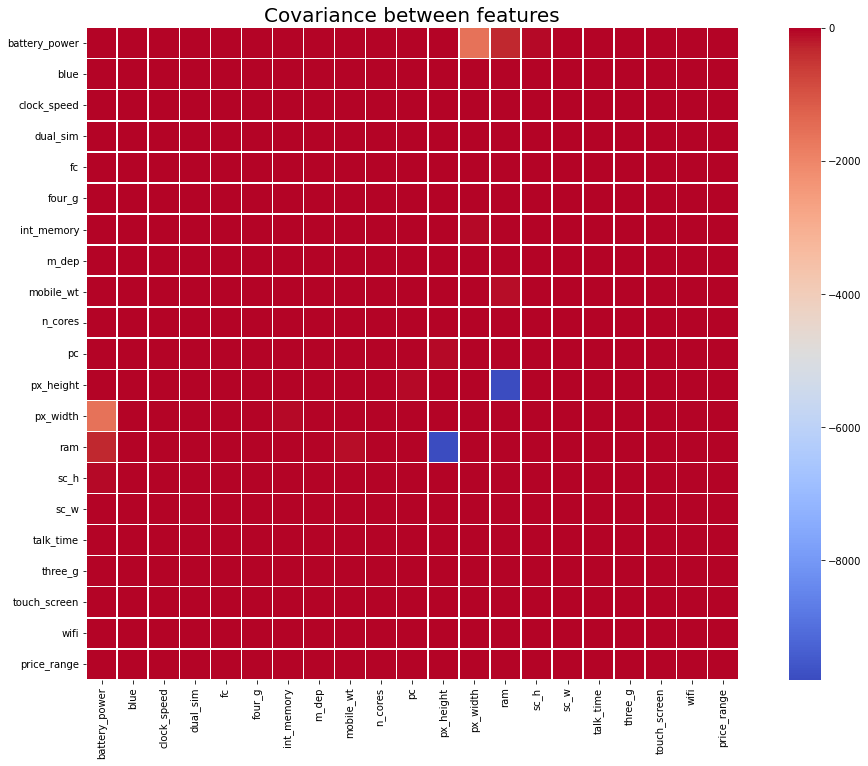

In [18]:
plt.figure(figsize=(18,12))
sns.heatmap(data.cov(), vmax=.8, cmap='coolwarm', square=True, linewidths=.5)
plt.title('Covariance between features', size='20')
plt.show()

# Observations



*   'ram' and 'price range'(Target variable) is highly correlated.

    >  High ram = More price

*   'three_g' and 'four_g' is moderately correlated.

*   'pc'(primary camera) and 'fc'(front camera) is moderately correlated.
*   'px_height' and 'px_width' is moderately correlated.

*   'sc_h'(screen height) and sc_w(screen width) is moderately correlated.












# Machine Learning

**Feature Engineering**

In [19]:
# Converting screen width and height to diagonal
data['screen'] = round(np.sqrt((data['sc_h']**2) + (data['sc_w']**2)) , 1)
data.drop(['sc_h','sc_w'], axis=1, inplace=True)


In [20]:
# Converting pixel width and height to PPI
data['PPI'] = np.ceil(np.sqrt((data['px_height']**2) + (data['px_width']**2))/data['screen'])
data.drop(['px_height','px_width'], axis=1, inplace=True)

In [21]:
# moving price range to last
data['price_range'] = data.pop('price_range')

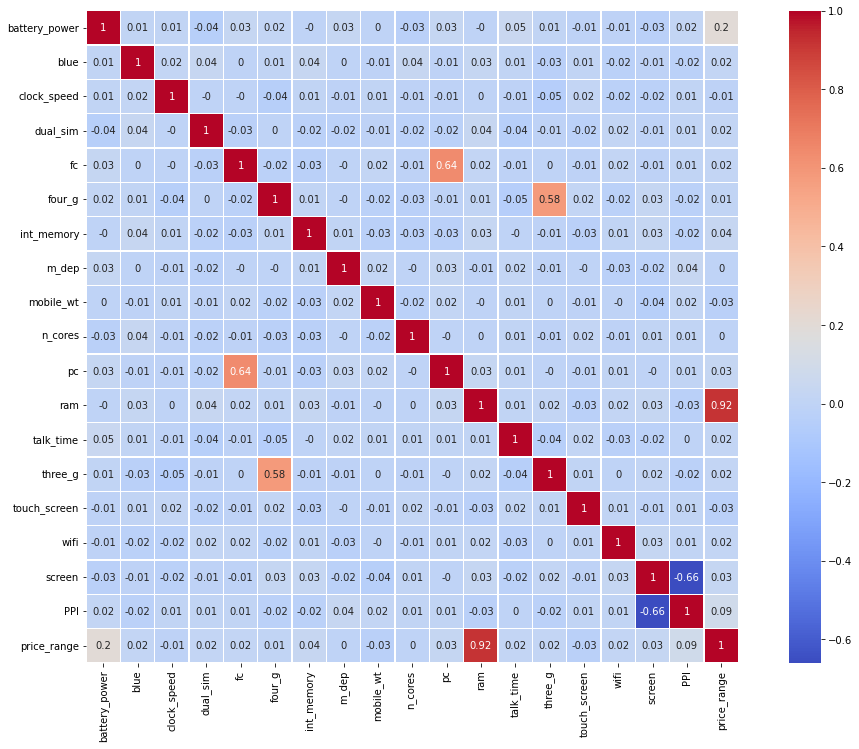

In [22]:
# Checking updated correlation
plt.figure(figsize=(18,12))
sns.heatmap(round(data.corr(), 2), cmap='coolwarm', annot=True, square=True, linewidths=.5)
plt.show()

# Observation



> Now we have a negative correlation between 'screen' and 'ppi'.


# Feature Importance

In [23]:
# preparing data for test train
data_copy = data.copy()
X = data_copy.iloc[:,:18]
Y = data_copy.iloc[:,18:]

In [24]:
# test train split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Standardising/Scaling
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

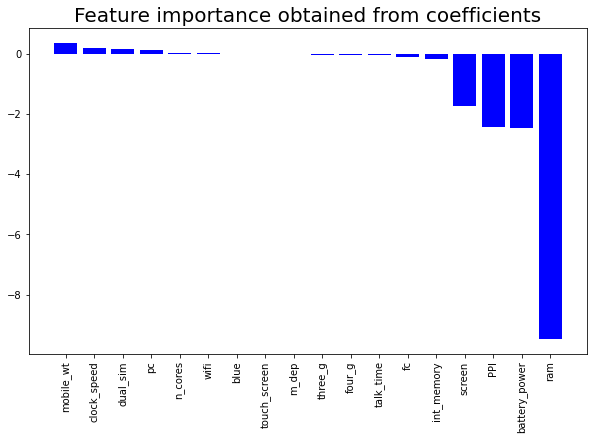

In [25]:
# creating dataframe to store coefficient
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)
importances = pd.DataFrame(data={
    'Attributes': X_train.columns,
    'Importance': model.coef_[0]
    })

# sorting dataframe by descending value of coefficients
importances = importances.sort_values(by='Importance', ascending=False)

# Visualising feature importance by their coefficient values
plt.figure(figsize=(10,6))
plt.bar(x=importances['Attributes'], height=importances['Importance'], color='blue')
plt.title('Feature importance obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()



**Dropping non relevant columns**

In [26]:
#Dropping non-important/significant columns.
data_copy.drop(['wifi','blue','m_dep','touch_screen'], axis=1, inplace=True)
X = data_copy.iloc[:,:14]
Y = data_copy.iloc[:,14:]

#Test Train Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

#Standardising/Scaling
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


**Confirming feature importance after multiple column drops**

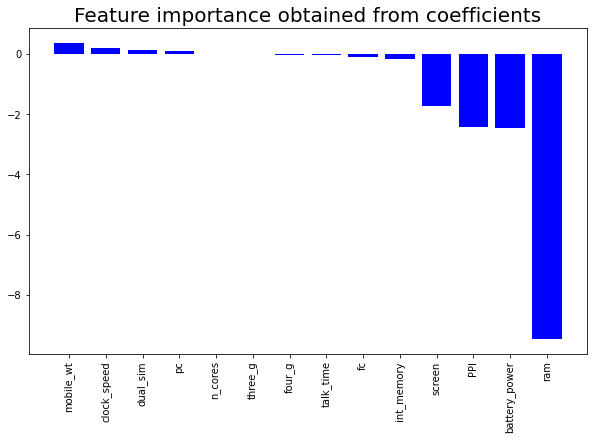

In [27]:
# creating dataframe to store coefficient
model.fit(X_train_scaled, Y_train)
importances = pd.DataFrame(data={
    'Attributes': X_train.columns, 
    'Importance': model.coef_[0]
})

# sorting dataframe by descending value of coefficients
importances = importances.sort_values(by='Importance', ascending=False)

# Visualising feature importance by their coefficient values
plt.figure(figsize=(10,6))
plt.bar(x=importances['Attributes'], height=importances['Importance'], color='blue')
plt.title('Feature importance obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

**This corresponds to heatmap correlation as well**

# Model Selection

According to the data, we need the select suitable classification models. We will do our comparison among the following models

*   Logistic Regression
*   Random Forest

*   KNN
*   SVM








# Visualisation functions

In [35]:
# Function to visualise confusion matrix

def print_conf_mat(x):
  plt.figure(figsize=(7,5))
  labels = ['0','1','2','3']
  ax = plt.subplot()
  sns.heatmap(x, annot=True, ax=ax, cmap='coolwarm')
  ax.set_xlabel('Predicted', size=15)
  ax.set_ylabel('Actual', size=15)
  ax.set_title('Confusion Matrix', size=20)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  plt.show()


In [74]:
# Function to visualise AUC-ROC curve

def plt_auc_roc(a,b):
  
  fpr = {}
  tpr = {}
  thresh = {}

  n_class = 4

  for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(a, b[:,i], pos_label=i)

# Plotting

  plt.figure(figsize=(15,10))
  plt.plot([0,1], [0,1], color="navy", linestyle="--")
  plt.plot(fpr[0], tpr[0], color='red', linestyle='--', label=((f'0(Low cost) vs roc, AUC= {round(auc(fpr[0], tpr[0]), 4)}')))
  plt.plot(fpr[1], tpr[1], color='orange', linestyle='--', label=((f'0(Medium cost) vs roc, AUC= {round(auc(fpr[1], tpr[1]), 4)}')))
  plt.plot(fpr[2], tpr[2], color='yellow', linestyle='--', label=((f'0(High cost) vs roc, AUC= {round(auc(fpr[2], tpr[2]), 4)}')))
  plt.plot(fpr[3], tpr[3], color='green', linestyle='--', label=((f'0(Very high cost) vs roc, AUC= {round(auc(fpr[3], tpr[3]), 4)}')))
  plt.title('Multiclass ROC-AUC curve', size=20)
  plt.xlabel('False positive', size=15)
  plt.ylabel('True positive', size=15)
  plt.legend(loc='best')


In [75]:
# Function to print accuracy score

def print_details(a_model, flag='detail', scale=0):
  if scale == 1:
    a_train_preds = a_model.predict(X_train_scaled)
    a_test_preds = a_model.predict(X_test_scaled)
    roc_train = roc_auc_score(Y_train, a_model.predict_proba(X_train_scaled), multi_class='ovr')
    roc_test = roc_auc_score(Y_test, a_model.predict_proba(X_test_scaled), multi_class='ovr')
    model_pred_prob = a_model.predict_proba(X_test_scaled)

  else:
    a_train_preds = a_model.predict(X_train)
    a_test_preds = a_model.predict(X_test)
    roc_train = roc_auc_score(Y_train, a_model.predict_proba(X_train), multi_class='ovr')
    roc_test = roc_auc_score(Y_test, a_model.predict_proba(X_test), multi_class='ovr')
    model_pred_prob = a_model.predict_proba(X_test)

  cm_train = confusion_matrix(a_train_preds, Y_train)
  cm_test = confusion_matrix(a_test_preds, Y_test)

  if flag == 'detail':
    print("The accuracy on train data:", accuracy_score(a_train_preds, Y_train))
    print("The accuracy on test data:", accuracy_score(a_test_preds, Y_test))
    print('\n')
    print("The confusion matrix on the train data is:")
    print(cm_train)
    print('\n')
    print("The confusion matrix on the test data is :")
    print(cm_test)
    print('\n')

    print("The classification report on train data is :")
    print(classification_report(a_train_preds, Y_train))
    print('\n')
    print("The classification report on test data is :")
    print(classification_report(a_test_preds, Y_test))
    print('\n')

    print("The ROC-AUC score on the train data is :", roc_train)
    print('\n')
    print("The ROC-AUC score on the test data is :", roc_test)

  if flag == 'matrix':
    print("Confusion matrix on train set")
    print_conf_mat(cm_train)
    print('\n\n')
    print("Confusion ,atrix on test set")
    print_conf_mat(cm_test)

  if flag == 'roc':
    plt_auc_roc(Y_test, model_pred_prob)


# Logistic Regression

In [76]:
# Initialising Logistic Regression
model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Fitting model
model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

# Evaluation Matrix

In [77]:
print_details(model, 'detail')

The accuracy on train data: 0.7366666666666667
The accuracy on test data: 0.75


The confusion matrix on the train data is:
[[309  45   0   0]
 [ 59 256  70   1]
 [  0  78 229  58]
 [  0   3  81 311]]


The confusion matrix on the test data is :
[[113   9   1   0]
 [ 19  82  25   0]
 [  0  27  70  20]
 [  0   0  24 110]]


The classification report on train data is :
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       354
           1       0.67      0.66      0.67       386
           2       0.60      0.63      0.61       365
           3       0.84      0.79      0.81       395

    accuracy                           0.74      1500
   macro avg       0.74      0.74      0.74      1500
weighted avg       0.74      0.74      0.74      1500



The classification report on test data is :
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       123
           1       0.69      0.65      0

**Confusion matrix for logistic regression classification**

Confusion matrix on train set


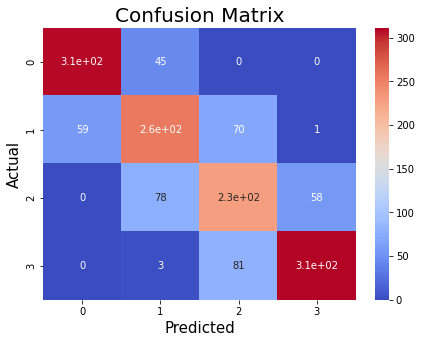




Confusion ,atrix on test set


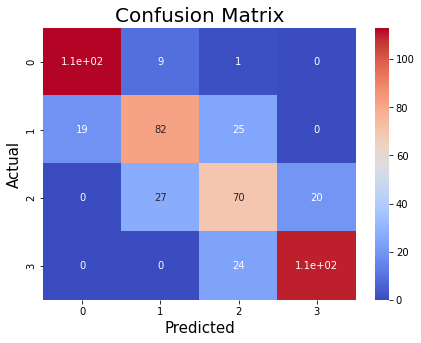

In [78]:
print_details(model, 'matrix')

**AUC-ROC Curve of 'price range' prediction - Logistic Regression Classification**

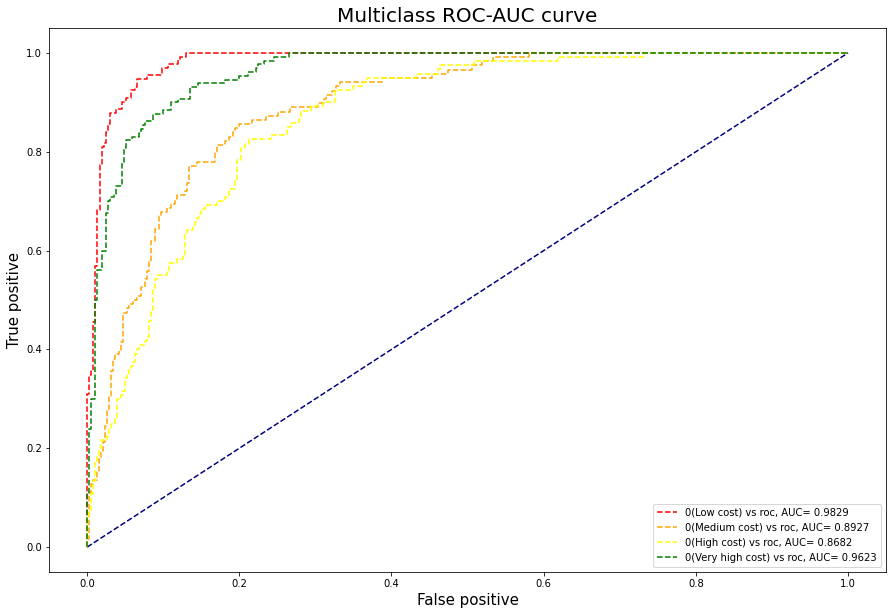

In [79]:
print_details(model, 'roc')

# Observations for Logistic Regression Classification

> 

